## Análise de sentimento usando Embeddings



In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 5.0 MB/s 
     |████████████████████████████████| 4.2 MB 17.9 MB/s 
     |████████████████████████████████| 1.2 MB 29.3 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 6.6 MB 35.7 MB/s 
     |████████████████████████████████| 596 kB 57.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=81c81cdb56779fa922c55a61697654f4fdfbe2be22414b675cc0cb7f7f12f5e7
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import pandas as pd
import re

import imblearn
from collections import Counter


## Aquisição dos dados e Pré-processamento 

In [ ]:
data = pd.read_csv('dataset_atualizado_06062022_aleatorio.csv')

#data.drop_duplicates(['comentarios'], inplace=True)
#data=data.sample(frac=1).reset_index(drop=True)

In [ ]:
id = (data['id_noticia'].copy(deep=True))
comentarios = (data['text'].copy(deep=True))
classes = (data['rotulacao_manual'].copy(deep=True))

In [ ]:
id = id.values
comentarios = comentarios.values
classes = classes.values

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def Preprocessing(instancia):
    #stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    #stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split()]
    return (" ".join(palavras))

# Aplica a função em todos os dados:
comentarios = [Preprocessing(i) for i in comentarios]

In [ ]:
len(comentarios)

3000

In [ ]:
comentarios

## Embedding

In [ ]:
#sentence_model = SentenceTransformer("neuralmind/bert-large-portuguese-cased")
#sentence_model = SentenceTransformer("bert-base-multilingual-cased")
embeddings = sentence_model.encode(comentarios, show_progress_bar=True)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/589 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/516 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/695M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/rdenadai_BR_BERTo were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Batches:   0%|          | 0/94 [00:00<?, ?it/s]

In [ ]:
embeddings.shape

(3000, 768)

In [ ]:
df_embedding = pd.DataFrame(embeddings)

In [ ]:
df_embedding

## função para salvar o modelo

In [ ]:
folder = '/content/drive/MyDrive/Best_model/0606/'

In [ ]:
import pickle

def salvModel(modelo, nome, X_train, y_train, X_test, y_test):
  y_pred = modelo.predict(X_test)
  pickle.dump(X_train, open(folder + 'R_0606/' + nome + 'X_train_bert_0606.pickle', 'wb'))
  pickle.dump(y_train, open(folder + 'R_0606/' + nome + 'y_train_bert_0606.pickle', 'wb'))
  pickle.dump(X_test, open(folder + 'R_0606/' + nome + 'X_test_bert_0606.pickle', 'wb'))
  pickle.dump(y_test, open(folder + 'R_0606/' + nome + 'y_test_bert_0606.pickle', 'wb'))
  pickle.dump(y_pred, open(folder + 'R_0606/' + nome + 'y_pred_bert_0606.pickle', 'wb'))
  pickle.dump(modelo, open(folder + 'R_0606/' + nome + '_0606.pickle', 'wb'))

## Random Forest

In [ ]:
counter = Counter(classes)
print(counter)

Counter({-1: 2044, 0: 794, 1: 162})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_embedding, classes, test_size = 0.2, random_state=42, shuffle=False)

In [ ]:
counter = Counter(y_train)
print(counter)

Counter({-1: 1636, 0: 628, 1: 136})


In [ ]:
counter = Counter(y_test)
print(counter)

Counter({-1: 408, 0: 166, 1: 26})


#### GridSearch RF

In [ ]:
def grid(X_train, y_train):
  rf_clf = RandomForestClassifier()
  param_grid = {'n_estimators': [250, 300, 350],'max_depth' : [8,10, 12], 'bootstrap': [False], 'n_jobs': [-1]}
  grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')

  grid_search.fit(X_train, y_train)

  return grid_search.best_params_

In [ ]:
#grid(X_train, y_train)

In [ ]:
rf_clf = RandomForestClassifier(max_depth=12, n_estimators= 300, n_jobs= -1, bootstrap=False)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=12, n_estimators=300,
                       n_jobs=-1)

In [ ]:
salvModel(rf_clf, 'rf', X_train, y_train, X_test, y_test)

#### Métricas

In [ ]:
def class_3_confunsion_matrix(y_test, predictions, classe):
  matrix = confusion_matrix(y_test, predictions)

  if classe == -1:
    TP = matrix[0][0]
    FN = matrix[0][1] + matrix[0][2]
    FP = matrix[1][0] + matrix[2][0]
    TN = matrix[1][1] + matrix[1][2] + matrix[2][1] + matrix[2][2]
  elif classe == 0:
    TP = matrix[1][1]
    FN = matrix[1][0] + matrix[1][2]
    FP = matrix[0][1] + matrix[2][1]
    TN = matrix[0][0] + matrix[0][2] + matrix[2][0] + matrix[2][2]
  elif classe == 1:
    TP = matrix[2][2]
    FN = matrix[2][0] + matrix[2][1]
    FP = matrix[0][2] + matrix[1][2]
    TN = matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1]
  
  return [TP, FN, FP, TN]

In [ ]:
def metricas_auc_roc(modelo, X_test, y_test):
  y_score = modelo.predict_proba(X_test)

  y_test_bin = label_binarize(y_test, classes=[-1, 0, 1])
  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  result = []

  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    result.append(auc(fpr[i], tpr[i]))
  return result

In [ ]:
metricas_auc_roc(rf_clf, X_test, y_test)

[0.7101205065359477, 0.7152712231414136, 0.7287590458322166]

In [ ]:
predictions = rf_clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.72      0.97      0.83       408
           0       0.74      0.20      0.32       166
           1       1.00      0.04      0.07        26

    accuracy                           0.72       600
   macro avg       0.82      0.41      0.41       600
weighted avg       0.74      0.72      0.65       600



In [ ]:
def metricas(modelo, modelo_nome, X_test, y_test, df):
  predictions = modelo.predict(X_test)

  report = classification_report(y_test, predictions, output_dict=True)
  metricas = pd.DataFrame(report).transpose()

  aucRoc = metricas_auc_roc(modelo, X_test, y_test)

  metricas_neg = list(metricas.iloc[[0]].values[0])
  metricas_neg.append(aucRoc[0])
  metricas_neg = metricas_neg + class_3_confunsion_matrix(y_test, predictions, -1)

  metricas_pos = list(metricas.iloc[[2]].values[0])
  metricas_pos.append(aucRoc[2])
  metricas_pos = metricas_pos + class_3_confunsion_matrix(y_test, predictions, 1)
  
  metricas_neu = list(metricas.iloc[[1]].values[0])
  metricas_neu.append(aucRoc[1])
  metricas_neu = metricas_neu + class_3_confunsion_matrix(y_test, predictions, 0)

  result = metricas_neg + metricas_pos + metricas_neu
  result = [modelo_nome] + result

  result.append(accuracy_score(y_test, predictions))

  df_aux = pd.DataFrame([result], columns=['modelo', 'precision(-1)', 'recall(-1)', 'f1-score(-1)', 'suport(-1)', 'auc-roc(-1)',  'TP(-1)', 'FN(-1)', 'FP(-1)', 'TN(-1)', 'precision(1)', 'recall(1)', 'f1-score(1)', 'suport(1)', 'auc-roc(1)', 'TP(1)', 'FN(1)', 'FP(1)', 'TN(1)', 'precision(0)', 'recall(0)', 'f1-score(0)', 'suport(0)', 'auc-roc(0)', 'TP(0)', 'FN(0)', 'FP(0)', 'TN(0)', 'accuracy'])

  return pd.concat([df_aux, df])

  #print(metricas)
  #print(list(metricas.iloc[[1]].values))

In [ ]:
df_metricas = pd.DataFrame(columns=['modelo', 'precision(-1)', 'recall(-1)', 'f1-score(-1)', 'suport(-1)', 'auc-roc(-1)',  'TP(-1)', 'FN(-1)', 'FP(-1)', 'TN(-1)', 'precision(1)', 'recall(1)', 'f1-score(1)', 'suport(1)', 'auc-roc(1)', 'TP(1)', 'FN(1)', 'FP(1)', 'TN(1)', 'precision(0)', 'recall(0)', 'f1-score(0)', 'suport(0)', 'auc-roc(0)', 'TP(0)', 'FN(0)', 'FP(0)', 'TN(0)', 'accuracy'])
df_metricas = metricas(rf_clf, 'RF-RoBERTa', X_test, y_test, df_metricas)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
df_metricas

,modelo,precision(-1),recall(-1),f1-score(-1),suport(-1),auc-roc(-1),TP(-1),FN(-1),FP(-1),TN(-1),...,precision(0),recall(0),f1-score(0),suport(0),auc-roc(0),TP(0),FN(0),FP(0),TN(0),accuracy
0,RF-RoBERTa,0.734848,0.95098,0.82906,408.0,0.711218,388,20,140,52,...,0.652778,0.283133,0.394958,166.0,0.708525,47,119,25,409,0.725


In [ ]:
df_metricas[['f1-score(-1)', 'f1-score(1)', 'f1-score(0)']]

In [ ]:
0,35	0,0 	0,73

#### SMOTE RF

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
counter = Counter(y_res)
print(counter)

Counter({0: 1636, 1: 1636, -1: 1636})


In [ ]:
#grid(X_res, y_res)

In [ ]:
rf_clf = RandomForestClassifier(max_depth=12, n_estimators= 300, n_jobs= -1, bootstrap=False)
rf_clf.fit(X_res,y_res)

RandomForestClassifier(bootstrap=False, max_depth=12, n_estimators=300,
                       n_jobs=-1)

In [ ]:
salvModel(rf_clf, 'rf_smote', X_res, y_res, X_test, y_test)

In [ ]:
df_metricas = metricas(rf_clf, 'RF-RoBERTa-SMOTE', X_test, y_test, df_metricas)

In [ ]:
df_metricas[['modelo','f1-score(-1)', 'f1-score(1)', 'f1-score(0)']]

,modelo,f1-score(-1),f1-score(1),f1-score(0)
0,RF-RoBERTa-SMOTE,0.798665,0.222222,0.377358
0,RF-RoBERTa,0.829060,0.000000,0.394958


In [ ]:
RF-BERTimbau-SMOTE	0,37	0,18	0,76
RF-BERTimbau	      0,35	0,0 	0,73

SyntaxError: ignored

In [ ]:
df_metricas

,modelo,precision(-1),recall(-1),f1-score(-1),suport(-1),auc-roc(-1),TP(-1),FN(-1),FP(-1),TN(-1),...,precision(0),recall(0),f1-score(0),suport(0),auc-roc(0),TP(0),FN(0),FP(0),TN(0),accuracy
0,RF-RoBERTa-SMOTE,0.731161,0.879902,0.798665,408.0,0.694610,359,49,132,60,...,0.505051,0.301205,0.377358,166.0,0.702418,50,116,49,385,0.688333
0,RF-RoBERTa,0.734848,0.950980,0.829060,408.0,0.711218,388,20,140,52,...,0.652778,0.283133,0.394958,166.0,0.708525,47,119,25,409,0.725000


## RF UNDER_SAMPLE SMOTE

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler()
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
counter = Counter(y_res)
print(counter)

Counter({-1: 136, 0: 136, 1: 136})


In [ ]:
rf_clf = RandomForestClassifier(max_depth=12, n_estimators= 300, n_jobs= -1, bootstrap=False)
rf_clf.fit(X_res,y_res)

RandomForestClassifier(bootstrap=False, max_depth=12, n_estimators=300,
                       n_jobs=-1)

In [ ]:
salvModel(rf_clf, 'rf_smote_undersampler', X_res, y_res, X_test, y_test)

In [ ]:
df_metricas = metricas(rf_clf, 'RF-RoBERTa-SMOTE-UnderSampler', X_test, y_test, df_metricas)

In [ ]:
df_metricas

,modelo,precision(-1),recall(-1),f1-score(-1),suport(-1),auc-roc(-1),TP(-1),FN(-1),FP(-1),TN(-1),...,precision(0),recall(0),f1-score(0),suport(0),auc-roc(0),TP(0),FN(0),FP(0),TN(0),accuracy
0,RF-RoBERTa-SMOTE-UnderSampler,0.777778,0.566176,0.655319,408.0,0.662205,231,177,66,126,...,0.415179,0.560241,0.476923,166.0,0.682874,93,73,131,303,0.560000
0,RF-RoBERTa-SMOTE,0.731161,0.879902,0.798665,408.0,0.694610,359,49,132,60,...,0.505051,0.301205,0.377358,166.0,0.702418,50,116,49,385,0.688333
0,RF-RoBERTa,0.734848,0.950980,0.829060,408.0,0.711218,388,20,140,52,...,0.652778,0.283133,0.394958,166.0,0.708525,47,119,25,409,0.725000


## SVM

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df_embedding, classes, test_size = 0.2, random_state=1, shuffle=True)

#### GridSeach SVM

In [ ]:
def grid_svm(X_train, y_test):
  SupportVM = svm.SVC()

  tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
  ]

  grid_search = GridSearchCV(svm.SVC(), tuned_parameters, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)

  return grid_search.best_params_


In [ ]:
#grid_svm(X_train, y_test)

In [ ]:
#SupportVM = svm.SVC(kernel='rbf', C=10, gamma=0.001, probability=True)
SupportVM = svm.SVC(kernel='linear', C=10, probability=True)
SupportVM.fit(X_train ,y_train)

SVC(C=10, kernel='linear', probability=True)

In [ ]:
salvModel(SupportVM, 'svm', X_train, y_train, X_test, y_test)

In [ ]:
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
y_pred = SupportVM.predict(X_test)

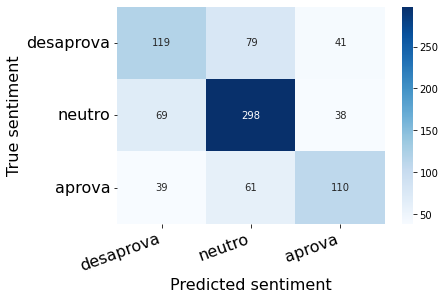

In [ ]:
def show_confusion_matriz(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  sns.set(font_scale=1.5)
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=20, ha='right', fontsize=16)
  plt.ylabel('True sentiment', fontsize=16)
  plt.xlabel('Predicted sentiment', fontsize=16);
  plt.savefig('matriz_conf_svm.pdf', dpi=300)
  
  
class_names = ['desaprova', 'neutro', 'aprova']
y_pred = SupportVM.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matriz(df_cm)

In [ ]:
df_metricas = metricas(SupportVM, 'SVM-RoBERTa', X_test, y_test, df_metricas)

In [ ]:
df_metricas

,modelo,precision(-1),recall(-1),f1-score(-1),suport(-1),auc-roc(-1),TP(-1),FN(-1),FP(-1),TN(-1),...,precision(0),recall(0),f1-score(0),suport(0),auc-roc(0),TP(0),FN(0),FP(0),TN(0),accuracy
0,SVM-RoBERTa,0.740310,0.936275,0.826840,408.0,0.706074,382,26,134,58,...,0.654321,0.319277,0.429150,166.0,0.708872,53,113,28,406,0.728333
0,RF-RoBERTa-SMOTE-UnderSampler,0.777778,0.566176,0.655319,408.0,0.662205,231,177,66,126,...,0.415179,0.560241,0.476923,166.0,0.682874,93,73,131,303,0.560000
0,RF-RoBERTa-SMOTE,0.731161,0.879902,0.798665,408.0,0.694610,359,49,132,60,...,0.505051,0.301205,0.377358,166.0,0.702418,50,116,49,385,0.688333
0,RF-RoBERTa,0.734848,0.950980,0.829060,408.0,0.711218,388,20,140,52,...,0.652778,0.283133,0.394958,166.0,0.708525,47,119,25,409,0.725000


#### SVM SMOTE

In [ ]:
from imblearn.over_sampling import SVMSMOTE
sm = SVMSMOTE()
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
counter = Counter(y_res)
print(counter)

Counter({0: 1636, 1: 1636, -1: 1636})


In [ ]:
#grid_svm(X_res, y_res)

In [ ]:
SupportVM = svm.SVC(kernel='rbf', C=10, gamma=0.001, probability=True)
SupportVM.fit(X_res ,y_res)

SVC(C=10, gamma=0.001, probability=True)

In [ ]:
salvModel(SupportVM, 'svm_smote', X_res, y_res, X_test, y_test)

In [ ]:
df_metricas = metricas(SupportVM, 'SVM-roBERTa-SMOTE', X_test, y_test, df_metricas)

In [ ]:
df_metricas

,modelo,precision(-1),recall(-1),f1-score(-1),suport(-1),auc-roc(-1),TP(-1),FN(-1),FP(-1),TN(-1),...,precision(0),recall(0),f1-score(0),suport(0),auc-roc(0),TP(0),FN(0),FP(0),TN(0),accuracy
0,SVM-roBERTa-SMOTE,0.735632,0.941176,0.825806,408.0,0.649101,384,24,138,54,...,0.619718,0.265060,0.371308,166.0,0.647521,44,122,27,407,0.718333
0,SVM-RoBERTa,0.740310,0.936275,0.826840,408.0,0.706074,382,26,134,58,...,0.654321,0.319277,0.429150,166.0,0.708872,53,113,28,406,0.728333
0,RF-RoBERTa-SMOTE-UnderSampler,0.777778,0.566176,0.655319,408.0,0.662205,231,177,66,126,...,0.415179,0.560241,0.476923,166.0,0.682874,93,73,131,303,0.560000
0,RF-RoBERTa-SMOTE,0.731161,0.879902,0.798665,408.0,0.694610,359,49,132,60,...,0.505051,0.301205,0.377358,166.0,0.702418,50,116,49,385,0.688333
0,RF-RoBERTa,0.734848,0.950980,0.829060,408.0,0.711218,388,20,140,52,...,0.652778,0.283133,0.394958,166.0,0.708525,47,119,25,409,0.725000


## SVM SMOTE UNDERSAMPLER

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler()
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
counter = Counter(y_res)
print(counter)

Counter({-1: 136, 0: 136, 1: 136})


In [ ]:
SupportVM = svm.SVC(kernel='rbf', C=10, gamma=0.001, probability=True)
SupportVM.fit(X_res ,y_res)

SVC(C=10, gamma=0.001, probability=True)

In [ ]:
salvModel(SupportVM, 'svm_smote_undersampler', X_res, y_res, X_test, y_test)

In [ ]:
df_metricas = metricas(SupportVM, 'SVM-roBERTa-SMOTE-UnderSampler', X_test, y_test, df_metricas)

In [ ]:
df_metricas

,modelo,precision(-1),recall(-1),f1-score(-1),suport(-1),auc-roc(-1),TP(-1),FN(-1),FP(-1),TN(-1),...,precision(0),recall(0),f1-score(0),suport(0),auc-roc(0),TP(0),FN(0),FP(0),TN(0),accuracy
0,SVM-roBERTa-SMOTE-UnderSampler,0.706306,0.960784,0.814123,408.0,0.403033,392,16,163,29,...,0.642857,0.108434,0.185567,166.0,0.350702,18,148,10,424,0.690000
0,SVM-roBERTa-SMOTE,0.735632,0.941176,0.825806,408.0,0.649101,384,24,138,54,...,0.619718,0.265060,0.371308,166.0,0.647521,44,122,27,407,0.718333
0,SVM-RoBERTa,0.740310,0.936275,0.826840,408.0,0.706074,382,26,134,58,...,0.654321,0.319277,0.429150,166.0,0.708872,53,113,28,406,0.728333
0,RF-RoBERTa-SMOTE-UnderSampler,0.777778,0.566176,0.655319,408.0,0.662205,231,177,66,126,...,0.415179,0.560241,0.476923,166.0,0.682874,93,73,131,303,0.560000
0,RF-RoBERTa-SMOTE,0.731161,0.879902,0.798665,408.0,0.694610,359,49,132,60,...,0.505051,0.301205,0.377358,166.0,0.702418,50,116,49,385,0.688333
0,RF-RoBERTa,0.734848,0.950980,0.829060,408.0,0.711218,388,20,140,52,...,0.652778,0.283133,0.394958,166.0,0.708525,47,119,25,409,0.725000


In [ ]:
df_metricas.to_csv('metricasRoBERTa0606.csv')